In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import astropy as ap
import pandas as pd
from astropy.cosmology import WMAP9 as cosmo
from astropy.constants import iau2012 as const
import astropy.units as u
from astropy.coordinates import Angle
from ipynb.fs.full.DataframeGOALS import *
from ipynb.fs.full.xi import *


,Name,RA,Dec,Redshift,D_L [Mpc],log(LIR),log(LIR_unc),AGNbol,AGNbol_unc,SFR [M$_{\odot}$],SFR_unc [M$_{\odot}$],un-corr SFR [M$_{\odot}$],Supernova rate [yr$^{-1}$],un-corr Supernova rate [yr$^{-1}$],Flux(TeV) [GeV cm$^{-2}$ s$^{-1}$],Flux(TeV) no AGN [GeV cm$^{-2}$ s$^{-1}$],SigmaIR (x 10$^{10}$ ),R_70 (kpc)
0,NGC0023,00h09m53.32s,+25d55m26.2s,0.01523,65.2,11.11,9.71,0.09,0.04,22.30,7.17,24.50,0.243594,0.267686,6.260177e-12,6.879315e-12,2.048,1.000564
1,NGC0034a,00h11m06.59s,-12d06m25.5s,0.01962,84.1,11.50,9.90,0.04,0.02,57.74,18.47,60.15,0.630807,0.657091,9.743605e-12,1.014959e-11,79.180,0.252117
2,MCG-02-01-051a,00h18m50.87s,-10d22m36.6s,0.02722,117.5,11.67,9.94,0.07,0.05,82.41,26.47,88.61,0.903875,0.971909,7.152331e-12,7.690679e-12,9.730,0.874689
3,ESO350-IG038,00h36m52.20s,-33d33m20.8s,0.02060,89.0,11.28,9.97,0.23,0.09,27.53,9.07,35.76,0.304871,0.395936,4.204856e-12,5.460852e-12,7.641,0.629992
4,NGC0232a,00h42m45.80s,-23d33m42.0s,0.02217,95.2,11.48,10.48,0.09,0.03,51.55,16.82,56.65,0.571041,0.627517,6.883478e-12,7.564261e-12,10.697,0.670315
5,NGC0232b,00h42m52.78s,-23d32m28.9s,0.02217,95.2,10.64,9.71,0.47,0.06,4.33,1.45,8.16,0.048073,0.090704,5.794853e-13,1.093368e-12,NaN,NaN
6,MCG+12-02-001,00h54m03.48s,+73d05m03.8s,0.01570,69.8,11.49,9.76,0.06,0.04,54.51,17.47,57.99,0.603606,0.642134,1.353497e-11,1.439891e-11,10.264,0.692232
7,NGC0317B,00h57m40.41s,+43d47m32.9s,0.01811,77.8,11.23,9.59,0.05,0.02,30.47,9.74,32.08,0.335235,0.352879,6.050689e-12,6.369146e-12,24.822,0.329983
8,IC1623AB,01h07m47.49s,-17d30m27.1s,0.02007,85.5,11.73,9.95,0.12,0.04,89.43,28.68,101.63,0.981993,1.115901,1.467543e-11,1.667663e-11,7.663,1.056114
9,MCG-03-04-014,01h10m08.98s,-16d51m09.7s,0.03349,144.0,11.62,10.02,0.07,0.04,73.03,23.42,78.53,0.805580,0.866215,4.244225e-12,4.563683e-12,3.390,1.398976


<Figure size 720x648 with 0 Axes>

In [3]:
HerschelChu_201 = np.loadtxt("HerschelChu.txt")
names_Chu = np.loadtxt('names.txt',dtype ='str')
DAsystem = np.array([i[1] for i in HerschelChu_201])
LIRsystem = np.array([i[3] for i in HerschelChu_201])
df_system = pd.DataFrame({ 'Optical name' : [i[1] for i in names_Chu],
                    'IRAS name' : [i[0] for i in names_Chu],
                     'log(LIR)': [i for i in LIRsystem],
                   'D_L [Mpc]': [i for i in DAsystem]})

In [4]:
def QIR(DL_compl,txt,syst):
    
    if txt == 'LIRGs':
        if syst == 'individual':
            complete_df = df[(df['D_L [Mpc]'] < DL_compl) & (df['log(LIR)'] < 12) ] #only galaxies within completeness radius
        if syst == 'system':
            complete_df = df_system[(df_system['D_L [Mpc]'] < DL_compl) & (df_system['log(LIR)'] < 12) ] #only galaxies within completeness radius
    if txt == 'All': 
        if syst == 'individual':
            complete_df = df[(df['D_L [Mpc]'] < DL_compl)] #only galaxies within completeness radius 
        else:
            complete_df = df_system[(df_system['D_L [Mpc]'] < DL_compl)] #only galaxies within completeness radius 
            
    logLIR_complete_array = complete_df['log(LIR)'].to_numpy()
    LIR_complete_array = np.array([pow(10,i) for i in logLIR_complete_array])
    
    totalIR = (sum(LIR_complete_array*u.solLum)).to(u.erg/u.yr) #total IR luminosity in solLum for complete set
    
    Dmax = DL_compl*u.Mpc 
    Volume = (4/3)*pow(Dmax,3)*np.pi #Completeness distance required to compute the volume in which IR is generated
    return (totalIR/Volume).value
    
def Generation_rate_diff(DL_compl,txt,E,alpha,eta,txt1,txt2,txt3):#at the moment only works for alpha = 2
    Emin = 1
    Emax = pow(10,11)
    if alpha == 2:
        Rp = np.log(Emax/Emin)
    else:
        Rp = ((pow(Emin,-alpha+2)-pow(Emax,-alpha+2))/(alpha-2))*pow(E,alpha-2)
    return (QIR(DL_compl,txt1,txt3)*eta)/Rp #erg Mpc-3 yr-1 

$\begin{equation}
    \mathrm{Q}_{\mathrm{IR}}(z=0) = \frac{1}{V} \sum_i L_{\mathrm{IR}},i = \frac{3}{4\pi D^3_{L,\mathrm{max}}} \sum_i L_{\mathrm{IR},i}
\end{equation}
$

This formula computes the local IR generation rate for a sample of galaxies within a certain volume. Here we consider the total IR luminosity from a volume-limited sub-sample of GOALS. Based on the luminosity distance of the most distance galaxy within this sample, the volume $V$ is computed in which these galaxies reside. 

Based on neutrino-production modelling it is assumed that the IR luminosity of a galaxy is related to the cosmic-ray luminosity. As such,

$\begin{equation}
\mathrm{Q}_{\mathrm{p}} = \eta  \cdot \mathcal{Q}_{\mathrm{IR}}(z=0)~,
\end{equation}$

where

$\begin{equation}
 E_\mathrm{p} \mathcal{Q}_\mathrm{E_p} = \frac{\mathcal{Q}_{\mathrm{p}}}{\ln(\frac{E_{\mathrm{max}}}{E_\mathrm{min}})}.
\end{equation}$

The energy-squared scaled neutrino flux here on Earth is then computed as
$\begin{equation}
E^2_{\nu_i}\Phi_{\nu_i} = \frac{c}{4\pi}t_H \xi_{\mathrm{z}}\frac{3K}{4(K+1)}\min[1,f_{\mathrm{pp}/\mathrm{p\gamma}}]E_\mathrm{p}Q_{E_\mathrm{p}}
\end{equation}$

* Taken from: https://arxiv.org/pdf/1509.00805.pdf
* $t_H = 1/H_0$ with $H_0$ the Hubble parameter
* Factor 3/4 takes into account that a certain fraction of energy is lost to e^{\pm}
* $K$ denotes the average ratio of charged to neutral pions with $K \approx 1$ for p$\gamma$-interactions and $K \approx 2$ for pp-interactions 
* $\xi_{z}$ encodes the source evolution with redshift $z$. For this the evolution of LIRGS will be used. Same as ULIRGs but shifted upwards?
* $f_{\mathrm{pp}/p\gamma}$ takes into account source environment into account. Bounded by one because of energy conservation






In [5]:
Dmax_range= np.arange(20,420,1)
Vmax = [(4/3)*np.pi*pow(i,3) for i in np.arange(20,420,1)]
QIR_LIRG_individual = [QIR(i,'LIRGs','individual') for i in Dmax_range]
QIR_U_LIRG_individual = [QIR(i,'All','individual') for i in Dmax_range]
QIR_LIRG_system = [QIR(i,'LIRGs','system') for i in Dmax_range]
QIR_U_LIRG_system = [QIR(i,'All','system') for i in Dmax_range]

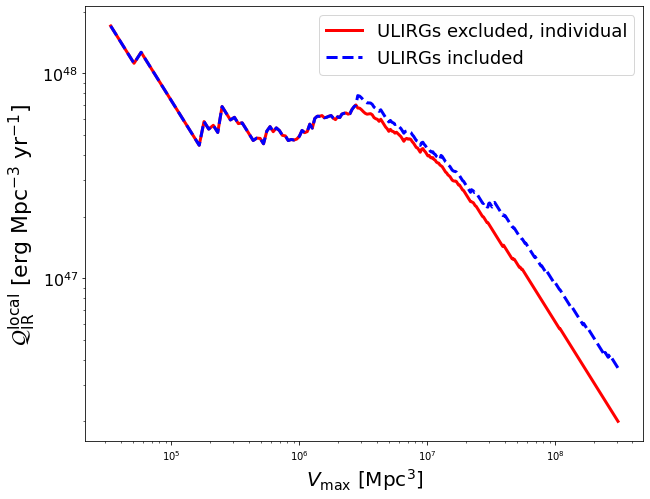

In [6]:
fig3 = plt.figure(figsize=(10,8))
plt.plot(Vmax,QIR_LIRG_individual, c = 'red', label = 'ULIRGs excluded, individual',linewidth =3)
#plt.plot(Vmax,QIR_LIRG_system, c = 'green', label = 'ULIRGs excluded, system',linewidth =3)

plt.plot(Vmax,QIR_U_LIRG_individual, c= 'blue', linestyle = '--', label = 'ULIRGs included',linewidth = 3)#plt.xticks(fontsize= 16)
#plt.plot(Vmax,QIR_U_LIRG_system, c= 'm', linestyle = 'dotted', label = 'ULIRGs included, system',linewidth = 3)#plt.xticks(fontsize= 16)

plt.yticks(fontsize= 16)
plt.ylabel('$\\mathcal{Q}^{ \mathrm{local}}_{\\mathrm{IR}}$ [erg Mpc$^{-3}$ yr$^{-1}$]', fontsize = 22)
plt.xlabel('$V_{\\mathrm{max}}$ [Mpc$^3$]',fontsize = 20)
plt.legend(fontsize = 18)
plt.yscale('log')
plt.xscale('log')

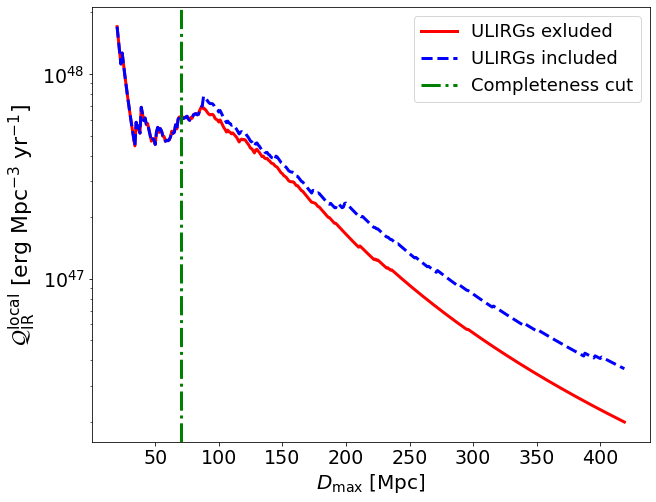

In [7]:
fig3 = plt.figure(figsize=(10,8))
plt.plot(Dmax_range,QIR_LIRG_individual, c = 'red', label = 'ULIRGs exluded',linewidth =3)
plt.plot(Dmax_range,QIR_U_LIRG_individual, c= 'blue', linestyle = '--', label = 'ULIRGs included',linewidth = 3)
plt.axvline(x = 70, linestyle = 'dashdot',c = 'green', linewidth = 3, label = 'Completeness cut')
plt.xticks(fontsize= 19)
plt.yticks(fontsize= 19)
plt.ylabel('$\\mathcal{Q}^{ \mathrm{local}}_{\\mathrm{IR}}$ [erg Mpc$^{-3}$ yr$^{-1}$]', fontsize = 22)
plt.xlabel('$D_{\\mathrm{max}}$ [Mpc]',fontsize = 20)
plt.legend(fontsize = 18)
plt.yscale('log')
plt.savefig("/Users/yarno/Documents/PhD/Pictures/Extrapolation_plots/QIR.png",bbox_inches="tight")



In [8]:
z_range = np.arange(0,4,0.01)
xi_U_2 = [xi(2,i,'ULIRG') for i in z_range]
xi_SFR_2 = [xi(2,i,'starforming') for i in z_range]
xi_flat_2 = [xi(2,i,'flat') for i in z_range]
xi_U_3 = [xi(3,i,'ULIRG') for i in z_range]
xi_SFR_3 = [xi(3,i,'starforming') for i in z_range]
xi_flat_3 = [xi(3,i,'flat') for i in z_range]

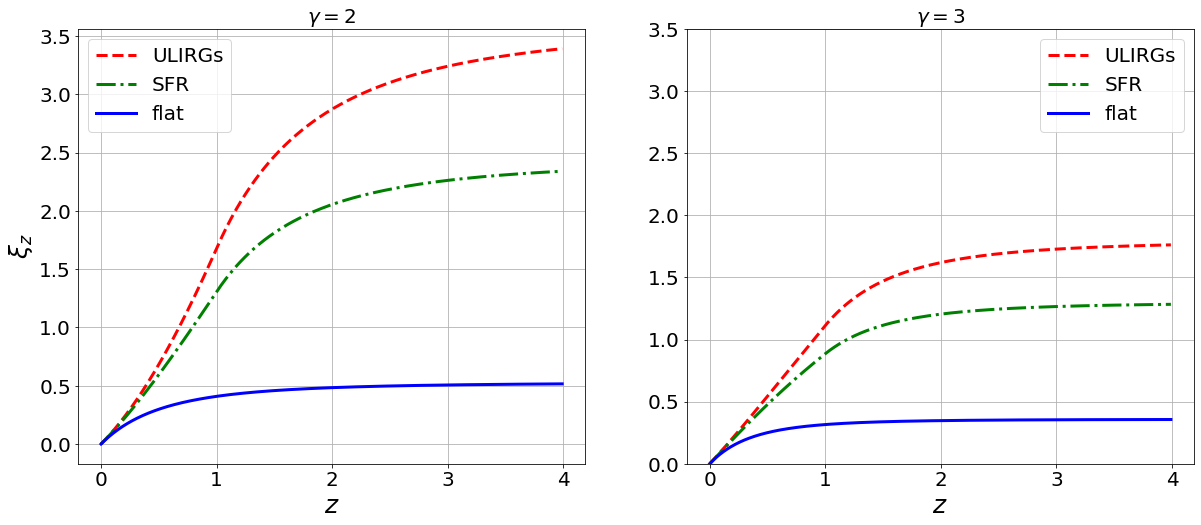

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
ax[0].plot(z_range,xi_U_2, color='red', label = 'ULIRGs', linestyle = '--', linewidth = 3)
ax[0].plot(z_range,xi_SFR_2, color='green', label = 'SFR',linestyle ='-.', linewidth = 3)
ax[0].plot(z_range,xi_flat_2, color='blue', label = 'flat',linewidth = 3 )
ax[1].plot(z_range,xi_U_3, color='red', label = 'ULIRGs', linestyle = '--',linewidth = 3)
ax[1].plot(z_range,xi_SFR_3, color='green', label = 'SFR', linestyle = '-.',linewidth = 3)
ax[1].plot(z_range,xi_flat_3, color='blue', label = 'flat',linewidth = 3)
ax[1].set_ylim(0,3.5)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)

ax[0].set_ylabel('$\\xi_z$', fontsize = 25)
ax[0].set_xlabel('$z$', fontsize = 25)
ax[1].set_xlabel('$z$', fontsize = 25)

ax[0].legend(fontsize = 20)
ax[1].legend(fontsize = 20)

ax[0].set_title('$\\gamma = 2$', fontsize = 20)
ax[1].set_title('$\\gamma = 3$', fontsize = 20)


ax[0].grid()
ax[1].grid()

plt.savefig("/Users/yarno/Documents/PhD/Pictures/Extrapolation_plots/Hz_evolution.png",bbox_inches="tight")


\begin{equation}
    E^{2}_{\nu_{}}\Phi_{\nu_i} \approx \frac{1}{3}\frac{c}{4\pi} t_{H} \xi_{z}\frac{3K}{4(1+K)} \min[1,f_{\mathrm{pp}/p\gamma}] \left(E_{\mathrm{CR}}\mathcal{Q}_{E_\mathrm{CR}}\right)~.
\end{equation}

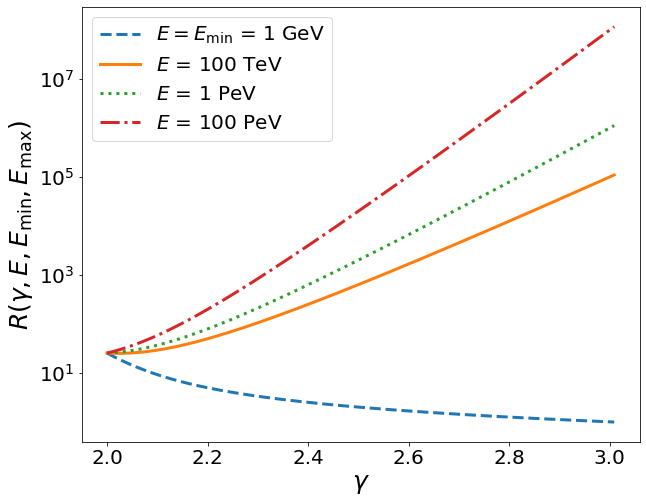

In [20]:
def Rp(E,Emin,Emax,s):
    if s==2:
        return np.log(Emax/Emin)
    else: 
        return ((pow(Emin,-s+2)-pow(Emax,-s+2))/(s-2))*pow(E,s-2)
    
fig3 = plt.figure(figsize=(10,8))
s_range = np.arange(2,3.01,0.001)
Rp = np.vectorize(Rp)

plt.plot(s_range, Rp(1,1,1e11,s_range),'--', label = '$E = E_{\min}$ = 1 GeV',linewidth = 3)
plt.plot(s_range, Rp(1e5,1,1e11,s_range), label= '$E$ = 100 TeV',linewidth = 3)
plt.plot(s_range, Rp(1e6,1,1e11,s_range),linestyle = 'dotted', label= '$E$ = 1 PeV',linewidth = 3)
plt.plot(s_range, Rp(1e8,1,1e11,s_range),linestyle = 'dashdot', label= '$E$ = 100 PeV',linewidth = 3)
plt.legend(fontsize = 20)
plt.yscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('$\\gamma$',fontsize = 25)
plt.ylabel('$R(\\gamma, E, E_{\\min}, E_{\\max})$',fontsize = 25)
plt.savefig("/Users/yarno/Documents/PhD/Pictures/Extrapolation_plots/R.png",bbox_inches="tight")

In [11]:
def nuflux(E,alpha,DL_compl,xiz,eta,fpp,txt,txt2,txt3):
    tH = (pow(cosmo.H(0),-1)).to((u.Mpc*u.s)/u.Mpc) #inverse of Hubble parameter in seconds
    
    ctH = (const.c).to(u.cm/u.s)*tH # unit: cm
    
    Generation_rate_nunits = (Generation_rate_diff(DL_compl,txt,E,alpha,eta,txt,txt2,txt3)*(u.erg/(pow(u.Mpc,3)*u.yr))).to(u.GeV/(pow(u.cm,3)*u.s)) #unit: GeV/(cm3 s sr)
    
    Kpi = lambda txt2: 0.5 if(txt2 == 'pp') else 3/8
    
    return ((1/3)*((ctH*xiz)/(4*np.pi))*Kpi(txt2)*fpp*Generation_rate_nunits).value# unit: GeV/(cm2 s sr)


In [12]:
nuflux(0,2,70,xi(2,4,'ULIRG'),1e-3,1,'All','pp','individual')

9.851824687220392e-09

In [13]:
F1 = [nuflux(0,2,i,xi(2,4,'ULIRG'),1e-3,1,'All','pp','individual') for i in Dmax_range ]
F2 = [nuflux(0,2,i,xi(2,4,'ULIRG'),1e-3,1,'LIRGs','pp','individual') for i in Dmax_range ]

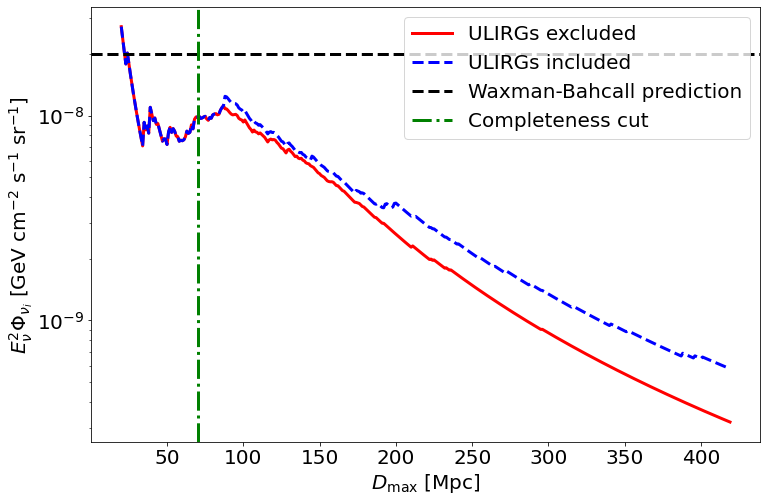

In [14]:
fig3 = plt.figure(figsize=(12,8))

plt.plot(Dmax_range,F2, color = 'red',linewidth = 3, label = 'ULIRGs excluded')
plt.plot(Dmax_range,F1, color = 'blue',linestyle='dashed',linewidth = 3,label = 'ULIRGs included')
plt.axhline(y= 2e-8, linestyle = '--', color = 'black',linewidth = 3, label = 'Waxman-Bahcall prediction')
plt.axvline(x = 70, linestyle = 'dashdot',c = 'green', label = 'Completeness cut', linewidth = 3)
plt.yscale('log')
plt.xlabel('$D_{\\mathrm{max}}$ [Mpc]',fontsize = 20)
plt.ylabel('$E^{2}_{\\nu_{}}\Phi_{\\nu_i}$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$] ',fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig("/Users/yarno/Documents/PhD/Pictures/Extrapolation_plots/LIRGnudiff.png",bbox_inches="tight")

In [15]:

#x_eta = np.arange(0.0001,0.1,0.0001)
#y_fpp = np.arange(0.01,1.01,0.01)
#X, Y = np.meshgrid(x_eta, y_fpp)
#Z = nuflux(0,2,70,xi(2,4,'ULIRG'),X,Y,'LIRGs','pp','individual')


In [16]:
#fig = plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
#plt.contour(X, Y, Z, colors='white',linewidths = 3, linestyles = 'dashdot',levels = [1e-8])
#pcm = plt.pcolor(X, Y, Z,
#                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
#                   cmap='plasma')
#cb1 = fig.colorbar(pcm,)
#cb1.set_label(label = '$E^{2}_{\\nu_{}}\Phi_{\\nu_i}$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$] ', fontsize = 20)
#plt.xlabel('$\eta$', fontsize = 19)
#plt.ylabel('$f_{\mathrm{pp}}$', fontsize = 19)
#plt.xticks(fontsize= 16)
#plt.yticks(fontsize= 16)
#plt.yscale('log')
#plt.xscale('log')

In [17]:
def Normalizing_factor(xiz, R,fpp,Qir):
    tH = (pow(cosmo.H(0),-1)).to((u.Mpc*u.s)/u.Mpc) #inverse of Hubble parameter in seconds
    ctH = (const.c).to(u.cm/u.s)*tH # unit: cm
    qq= fpp*(Qir*(u.erg/(pow(u.Mpc,3)*u.yr))).to(u.GeV/(pow(u.cm,3)*u.s))
    return xiz*R*(1/6)*(ctH/(4*np.pi))*1e-3*qq

In [18]:
print(Normalizing_factor(3.4,1/25,1, QIR(80,'LIRGs','individual')))

1.0248646351380786e-08 GeV / (cm2 s)


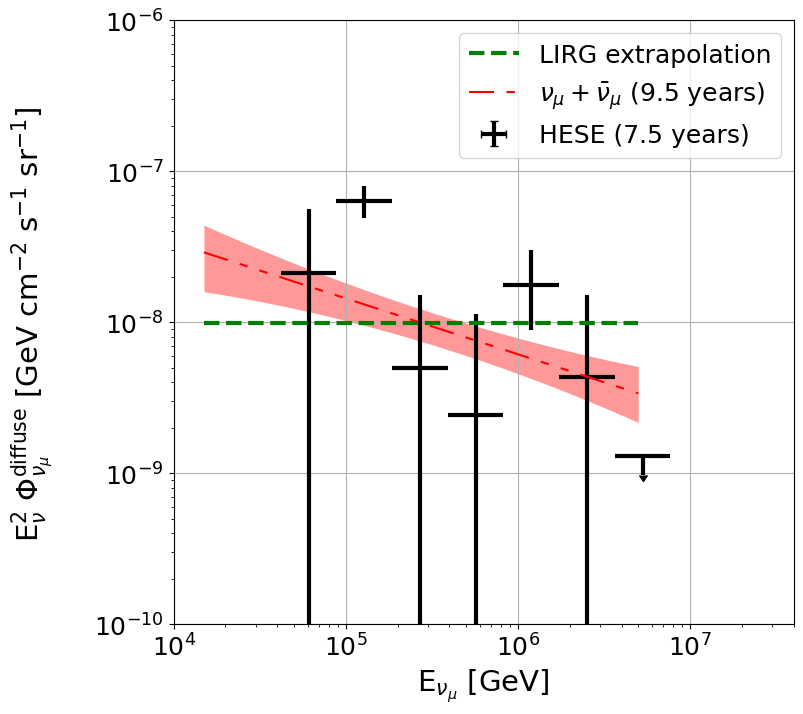

In [19]:
# Plot the HESE data up to index i
i = len(energy)
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
Energy_plot = np.logspace(np.log10(1.5e4),np.log10(5e6),12)
diffuse_LIRG_flux = [nuflux(i,2,70,3.4,1,1e-3,'LIRGs','pp','individual') for i in Energy_plot]
#diffuse_LIRG_flux_22 = [nuflux(i,2.29,420,3.4,1,0.2,'LIRGs','pp','individual') for i in Energy_plot]

plt.plot(Energy_plot, diffuse_LIRG_flux, 'g--', linewidth = 3,label = 'LIRG extrapolation')
#plt.plot(Energy_plot, diffuse_LIRG_flux_22, 'g-.', linewidth = 3,label = 'LIRG extrapolation $\\gamma = 2.2$')

HESE = plt.errorbar(energy[:i],
                   flux[:i],
                   xerr=[energy_lower_err[:i],energy_upper_err[:i]],
                   yerr=[flux_lower_err[:i],flux_upper_err[:i]],
                   uplims=upper_limits[:i],
                   marker="o",
                   markersize=0,
                   color="k",
                   linestyle="none",
                   linewidth=3,
                   capsize=0, label = 'HESE (7.5 years)')


en = np.arange(1e4,5e6,100)

# Plot the diffuse nu_mu best fit
plt.xscale('log')
plt.yscale('log')
numu_best = plt.plot(energy_range_numu,
                    flux_numu*energy_range_numu**2,
                    color="r",
                    linestyle=(0,(12,6,4,6,4,6)), label= '$\\nu_\\mu + \\bar{\\nu}_{\\mu}$ (9.5 years)') # dashdotdotted

# Plot the error band of the diffuse nu_mu best fit



numu_err = plt.fill_between(energy_numu,
                           flux_lower,
                           flux_upper,
                           color="r",
                           lw=0,
                           alpha=0.4)


plt.ylim(1e-10,1e-6)
plt.xlim(1e4,4e7)
plt.xlabel ("E$_{\\nu_\\mu}$ [GeV]", fontsize = 21)
plt.ylabel('E$_{\\nu}^2$ $\\Phi ^{\\mathrm{diffuse}}_{\\nu_\\mu}$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$] \n', fontsize = 21)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 18)
plt.grid()
plt.savefig("/Users/yarno/Documents/PhD/Pictures/Extrapolation_plots/PredictionVSobs.png",bbox_inches="tight")
